# --------------------- IKYRA BASIC STATISTICS ASSIGNEMNT -----------------------

In this assignment, we have to answer these following question:
Questions:
1. Perform basic exploratory data analysis which should include the following and print out your insights at every step:

    A. The shape of the data
    
    B. The data type of each attribute
    
    C. Checking the presence of missing values
    
    D. 5 points summary of numerical attributes
    
    E. Distribution of 'bmi', 'age' and 'charges' columns
    
    F. The measure of skewness of 'bmi', 'age', and 'charges' columns
    
    G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns
    

2. Answer the following questions with statistical evidence

    A. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
data = pd.read_csv(r"D:\Backup\Data Science\IYKRA\Tugas\Dataset\insurance.csv").drop_duplicates()

## 1.a The shape of the data

In [3]:
data.shape

(1337, 7)

## 1.b The data type of each attribute

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 1.c Checking the presence of missing values

In [5]:
data.isnull().sum() / len(data) * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## 1.d 5 points summary of numerical attributes

In [6]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 1.e Distribution of 'bmi', 'age' and 'charges' columns

Text(0.5, 1.0, 'Distribution Of BMI')

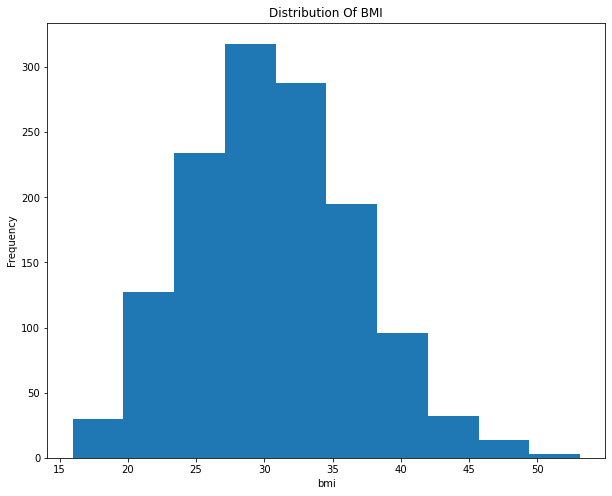

In [7]:
#Distribution of BMI
plt.figure(figsize=(10,8))
data.bmi.plot(kind='hist')
plt.xlabel('bmi')
plt.title('Distribution Of BMI')

Text(0.5, 1.0, 'Distribution Of Age')

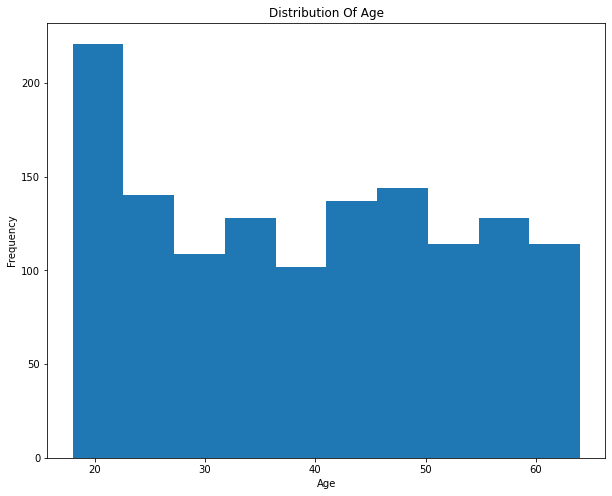

In [8]:
#Distribution of Age
plt.figure(figsize=(10,8))
data.age.plot(kind='hist')
plt.xlabel('Age')
plt.title('Distribution Of Age')

Text(0.5, 1.0, 'Distribution Of Charges')

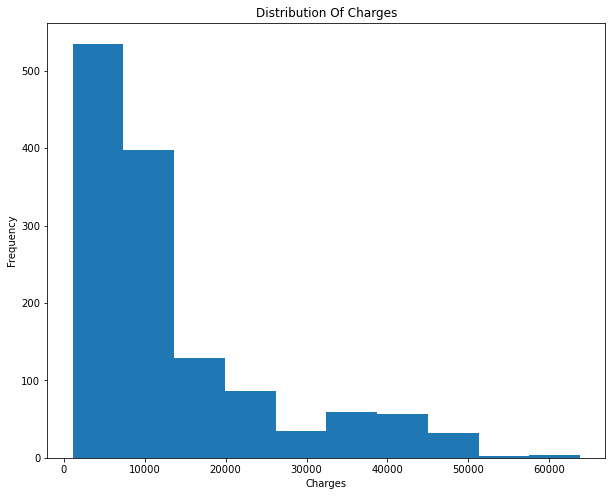

In [9]:
#Distribution of Charges
plt.figure(figsize=(10,8))
data.charges.plot(kind='hist')
plt.xlabel('Charges')
plt.title('Distribution Of Charges')

## 1.f The measure of skewness of 'bmi', 'age', and 'charges' columns

In [10]:
#Skewness of BMI
print("The skewness of BMI variable is", round(data.bmi.skew(),2))
#Skewness of Age
print("The skewness of Age variable is", round(data.age.skew(),2))
#Skewness of Charges
print("The skewness of Charges variable is", round(data.charges.skew(),2))

The skewness of BMI variable is 0.28
The skewness of Age variable is 0.05
The skewness of Charges variable is 1.52


## 1.g Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

In [11]:
#Mengitung persen outliers dari data    
def percent_outliers(i):
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    
    #menentukan upper limit biasa dan upper limit ekstim
    lower_limit = data[i].quantile(0.25) - (IQR * 1.5)
    lower_limit_extreme = data[i].quantile(0.25) - (IQR * 3)
    upper_limit = data[i].quantile(0.75) + (IQR * 1.5)
    upper_limit_extreme = data[i].quantile(0.75) + (IQR * 3)
    #melihat persenan outliers terhadap total data
    print('Lower Limit: {} %'.format(data[(data[i] >= lower_limit)].shape[0]/ data.shape[0]*100))
    print('Lower Limit Extereme: {} %'.format(data[(data[i] >= lower_limit_extreme)].shape[0]/data.shape[0]*100))
    print('Upper Limit: {} %'.format(data[(data[i] >= upper_limit)].shape[0]/ data.shape[0]*100))
    print('Upper Limit Extereme: {} %'.format(data[(data[i] >= upper_limit_extreme)].shape[0]/data.shape[0]*100))

Text(0.5, 1.0, 'Boxplot In BMI Column')

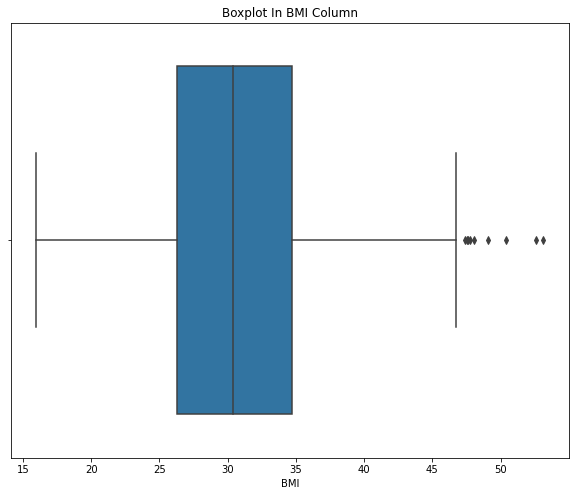

In [12]:
#Outliers in BMI Column
plt.figure(figsize=(10,8))
sns.boxplot(data.bmi)
plt.xlabel('BMI')
plt.title('Boxplot In BMI Column')

In [13]:
#Perncet outliers in BMI Column
percent_outliers('bmi')

Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.6731488406881078 %
Upper Limit Extereme: 0.0 %


Text(0.5, 1.0, 'Boxplot In Age Column')

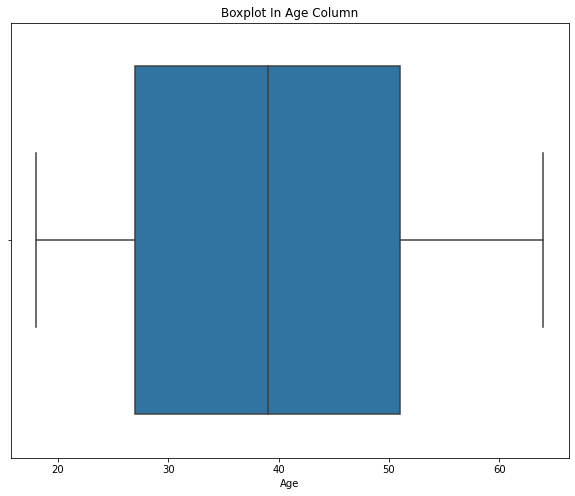

In [14]:
#Outliers in Age Column
plt.figure(figsize=(10,8))
sns.boxplot(data.age)
plt.xlabel('Age')
plt.title('Boxplot In Age Column')

In [15]:
#Perncet outliers in Age Column
percent_outliers('age')

Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %


Text(0.5, 1.0, 'Boxplot In Charges Column')

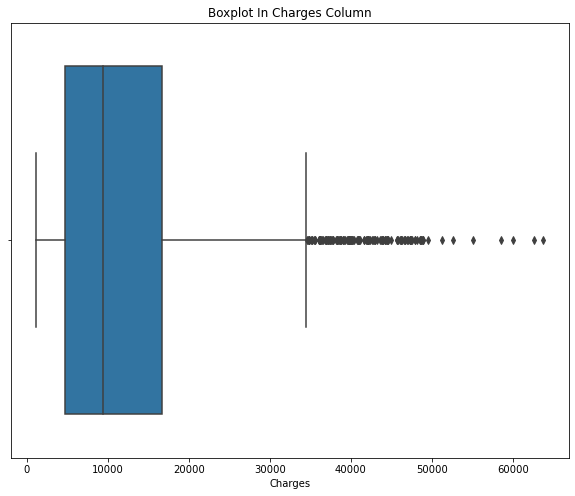

In [16]:
#Outliers in Age Column
plt.figure(figsize=(10,8))
sns.boxplot(data.charges)
plt.xlabel('Charges')
plt.title('Boxplot In Charges Column')

In [17]:
#Perncet outliers in Charges Column
percent_outliers('charges')

Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 10.396409872849663 %
Upper Limit Extereme: 0.44876589379207177 %


In [18]:
from pandas_profiling import ProfileReport

In [19]:
#profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

## 2. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [20]:
#Make a new data frame
data_n = data[data["smoker"] == "no"]
data_y = data[data["smoker"] == "yes"]

In [21]:
s_1 = data_n["charges"]
s_2 = data_y["charges"]
s_m = data["charges"]

In [22]:
print('-'*50, "Before")
print(s_1.shape)
print(s_2.shape)

#Make dataset is equal
s_1 =  s_1.sample(n=274) 
s_m = s_m.sample(n=274)

print('-'*50, "After")
print(s_1.shape)
print(s_2.shape)

-------------------------------------------------- Before
(1063,)
(274,)
-------------------------------------------------- After
(274,)
(274,)


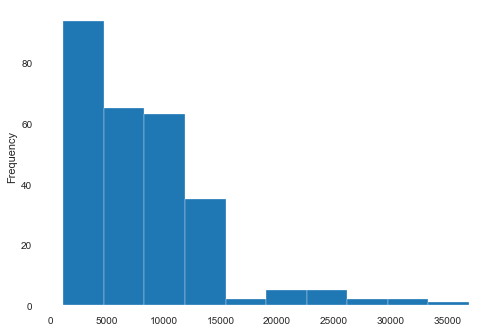

In [23]:
s_1.plot(kind='hist')

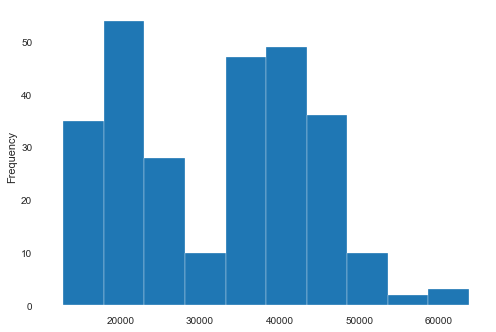

In [24]:
s_2.plot(kind='hist')

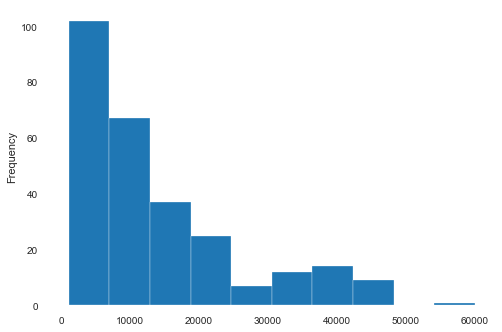

In [25]:
s_m.plot(kind='hist')

In [26]:
from scipy import stats
from statsmodels.stats import weightstats as ztests

In [27]:
s_m = data["charges"].mean()

ztest ,pval = ztests.ztest(s_1, x2=s_2, value=s_m,alternative='two-sided')
print(float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis
